# Quick start

In [1]:
%load_ext autoreload
%autoreload 2
import py3dinterpolations as p3i
import pandas as pd

## `GridData`: core object optimized for grid data.

The `GridData` object is the core object of the package. It is optimized for grid data, i.e. data that are defined on a grid (ie. X,Y,Z coordinates). 

GridData is optimized to handle large data sets. It is based on the `pandas` package and uses `pandas.DataFrame` as the underlying data structure.

Column names could be either default ["X", "Y", "Z","V"] or custom. In the latter case, the user must specify the column names in the function call.

In [2]:
df = pd.read_csv(
    "../../../tests/fixtures/griddata_default_colnames.csv"
)
df.tail()

ID       X    Y     Z          V
278  ID00  15.194  0.0  12.0   9.047969
279  ID00  15.194  0.0  10.0  10.077271
280  ID00  15.194  0.0   8.0  20.082454
281  ID00  15.194  0.0   6.0  19.042223
282  ID00  15.194  0.0   4.0  12.889411

In [3]:
gd = p3i.GridData(df)
gd.data

V
ID   X      Y      Z              
ID30 62.163 14.336 20.0   7.523950
                   18.0   7.504403
                   16.0  12.431670
                   14.0  12.653931
                   12.0  17.956143
...                            ...
ID00 15.194 0.000  12.0   9.047969
                   10.0  10.077271
                   8.0   20.082454
                   6.0   19.042223
                   4.0   12.889411

[283 rows x 1 columns]

## Interpolate

Interpolate by calling the `interpolate` method, that:

- Calulcates required 3d grid for prediction
- Executes preprocessing
- Fit the model
- Executes interpolation 

The method by defaults returns only the a `np.ndarray` with the interpolated values.
Optionally the model object can be returned as well, using the `return_model` argument.

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 0.9354345660967028
Full Sill: 1.3881780379488828
Range: 1.3471914574752943
Nugget: 0.45274347185218 



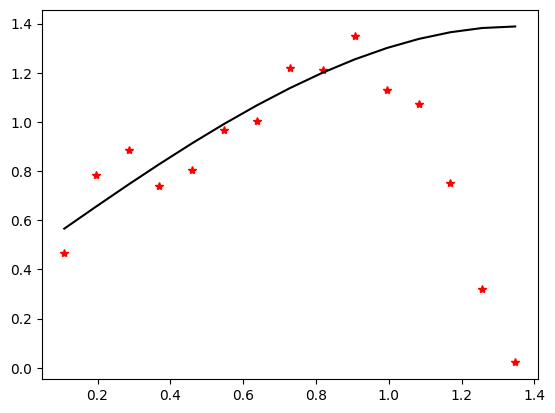

Calculating statistics on variogram model fit...
Q1 = 0.07837620908121956
Q2 = 1.008397764148196
cR = 0.679391581672394 

Executing Ordinary Kriging...



In [4]:
interpolated, model = p3i.interpolate(
    gd,
    model_name = "ordinary_kriging",
    model_params = {
        "variogram_model": "spherical",
        "nlags": 15,
        "weight": True,
        "exact_values": False,
        "verbose": True,
        "enable_plotting": True,
    },
    grid_resolution=5,
    preprocess_kwags={
        "normalize_xyz": True,
        "standardize_v": True,
    },
    return_model=True, # get all components, not only the resulting interpolated grid
)

In [5]:
interpolated

masked_array(
  data=[[[29.423759391032725, 30.930542525945366, 32.37926926650871,
          ..., 24.180114055426763, 22.928542077653777,
          21.663525321707258],
         [32.68867888276294, 34.52366946283111, 36.277011025889195, ...,
          25.278306140309013, 23.851979431098265, 22.424350089200736],
         [34.62470388758202, 36.72375274697788, 38.73558505042116, ...,
          25.879419661341863, 24.26011697050868, 22.663221801262242],
         ...,
         [6.749319354554428, 7.305975941902538, 7.901796135938893, ...,
          8.202192488287524, 7.278511599347368, 6.401160909354129],
         [5.445543882632929, 5.91535796204953, 6.403591248973422, ...,
          6.168232290633863, 5.445384710852551, 4.756242977571008],
         [4.137828456815573, 4.526122441758957, 4.918559512889301, ...,
          4.382454018232485, 3.8598643764018217, 3.390880043018427]],

        [[25.79533387847533, 27.401469408769053, 29.113800273484188,
          ..., 23.93734961069428, 22.633

In [6]:
model

## Visualization with Plotly and Matplotlib

The package natively supports `matplotlib` and `plotly` for visualization.

Plotly is preferred for 3D interactive visualization, while matplotlib is preferred for 2D visualization.

Both methods features the possibility to plot the data points as well as the interpolated surface/volume.

In [7]:
import plotly.io as pio
# This ensures Plotly output works in multiple places:
# plotly_mimetype: VS Code notebook UI
# notebook: "Jupyter: Export to HTML" command in VS Code
# See https://plotly.com/python/renderers/#multiple-renderers
pio.renderers.default = "plotly_mimetype"

In [8]:
fig = p3i.plot_3d_model(
    model,
    plot_points=True,
    scale_points=10,
    volume_kwargs={
        "surface_count": 10,
    }
)
fig.show()

In [9]:
fig2 = p3i.plot_2d_model(
    model,
    axis="Z",
    plot_points=True,
    annotate_points=True,
)

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 2400x3000 with 6 Axes>